In [370]:
#NAME : CHOEUNHYE NUMBER : 220202862
import requests
from bs4 import BeautifulSoup   
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [87]:
#1-1 Collect the name of all the countries per continent from English Wikipedia.
page =requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")
page

<Response [200]>

In [88]:
soup =BeautifulSoup(page.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7be5433b-0b48-4cfc-85f6-9a37ba96cdba","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":7187826,"wgRevisionId":7187826,"wgArticleId":4810,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: empty unknown parameters","Articles needing additional references from 

In [310]:
#list of continents
remove = ['References', 'Other websites']
continents=[]
continent=soup.find_all("span",class_='mw-headline')
for item in continent:
    c=item.get_text().strip()
    if c not in remove:
        continents.append(c)
print(continents) 

['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'South America', 'Australia/Oceania']


In [329]:
#list of country
countries_ol= soup.findAll('ol')
countries_li= [countries.findAll('li',{'class':None , 'id':None}) for countries in countries_ol if countries.findAll('li',{'class':None}) ]
print(countries_li)

[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>, <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>, <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>, <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>, <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>, <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>, <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>, <li><a href="/wiki/Cape_Verde" title="Cape Verde">Cape

In [344]:
countries_final= []
countries_a=[]
for c in countries_li[:len(continents)]:
    if c:
        for country in c:
            countries_a = [country.find('a').text  for country in c if country.find('a')]
        countries_final.append(countries_a)
for i in range(6,1,-1):
    countries_final[i]=countries_final[i-1]
countries_final[1]=['']
print(countries_final)

[['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'], [''], ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Ma

In [337]:
#1-2 Create countries-continents pandas dataframe. Dataframe should have two columns: country, continent.
import pandas as pd

In [354]:
df_continents = pd.DataFrame()
df_continents['continent'] = continents
df_continents

,continent
0,Africa
1,Antarctica
2,Asia
3,Europe
4,North America
5,South America
6,Australia/Oceania


In [355]:
df_country = pd.DataFrame()
df_country['country'] = countries_final
df_country

,country
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,[]
2,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba..."
3,"[Albania, Andorra, Austria, Belarus, Belgium, ..."
4,"[Antigua and Barbuda, Anguilla, Aruba, The Bah..."
5,"[Argentina, Bolivia, Brazil, Chile, Colombia, ..."
6,"[Australia, Federated States of Micronesia, Fi..."


In [353]:
#Create contries-continents pandas dataframe with two columns : country, continent
df_merge = pd.concat([df_continents, df_country], axis=1)
df_merge

,continent,country
0,Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,Antarctica,[]
2,Asia,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba..."
3,Europe,"[Albania, Andorra, Austria, Belarus, Belgium, ..."
4,North America,"[Antigua and Barbuda, Anguilla, Aruba, The Bah..."
5,South America,"[Argentina, Bolivia, Brazil, Chile, Colombia, ..."
6,Australia/Oceania,"[Australia, Federated States of Micronesia, Fi..."


In [58]:

import csv

In [356]:
page =requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")
page 


<Response [200]>

In [74]:
#1-3 Collect the happiness score, GDP per capital, social support, healthy life expextancy,freedom to make life choices, generosity, and perceptions of corruption per country in 2019 from English Wikipedia and put all collected information in a dataframe.
soup = BeautifulSoup(page.content, "html.parser")
out = open("WorldHappinessReport.html","w", encoding="utf-8")
out.write(str(soup))
out.close()
soup=BeautifulSoup(open("WorldHappinessReport.html", encoding='utf-8'), "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   World Happiness Report - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8c0865dc-8134-47dd-81ea-0938e864b35a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"World_Happiness_Report","wgTitle":"World Happiness Report","wgCurRevisionId":990403002,"wgRevisionId":990403002,"wgArticleId":42576223,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Wikipedia pending changes protected pages","Official website different in Wikidata and Wik

In [75]:
table=soup.find('table',{'class':'wikitable sortable'})
table

<table class="wikitable sortable">
<tbody><tr valign="top">
<th style="width: 10px;">Overall rank
</th>
<th style="width: 250px;">Country or region
</th>
<th><abbr title="Happiness score">Score</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: GDP">GDP per capita</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Social support">Social support</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Healthy life expectancy">Healthy life expectancy</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Freedom to make life choices">Freedom to make life choices</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Generosity">Generosity</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Perceptions of corruption">Perceptions of corruption</abbr>
</th></tr>
<tr>
<td>1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" height="14" src="//uploa

In [76]:
links=table.find_all('a')
links

[<a href="/wiki/Finland" title="Finland">Finland</a>,
 <a href="/wiki/Denmark" title="Denmark">Denmark</a>,
 <a href="/wiki/Norway" title="Norway">Norway</a>,
 <a href="/wiki/Iceland" title="Iceland">Iceland</a>,
 <a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>,
 <a href="/wiki/Switzerland" title="Switzerland">Switzerland</a>,
 <a href="/wiki/Sweden" title="Sweden">Sweden</a>,
 <a href="/wiki/New_Zealand" title="New Zealand">New Zealand</a>,
 <a href="/wiki/Canada" title="Canada">Canada</a>,
 <a href="/wiki/Austria" title="Austria">Austria</a>,
 <a href="/wiki/Australia" title="Australia">Australia</a>,
 <a href="/wiki/Costa_Rica" title="Costa Rica">Costa Rica</a>,
 <a href="/wiki/Israel" title="Israel">Israel</a>,
 <a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a>,
 <a href="/wiki/United_Kingdom" title="United Kingdom">United Kingdom</a>,
 <a href="/wiki/Republic_of_Ireland" title="Republic of Ireland">Ireland</a>,
 <a href="/wiki/Germany" title="Germany">Ge

In [359]:
country =[]
for l in links:
    country.append(l.get('title'))
print(country)    

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Costa Rica', 'Israel', 'Luxembourg', 'United Kingdom', 'Republic of Ireland', 'Germany', 'Belgium', 'United States', 'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico', 'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador', 'Italy', 'Bahrain', 'Slovakia', 'Trinidad and Tobago', 'Poland', 'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua', 'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait', 'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica', 'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya', 'Montenegro', 'Tajikistan', 'Croatia', 'Hong Kong', 'Dominican Republic', 'Bosnia and Herzegovina', 'Turkey', 'M

In [360]:
df=pd.DataFrame()
df["Country"]=country
df

,Country
0,Finland
1,Denmark
2,Norway
3,Iceland
4,Netherlands
5,Switzerland
6,Sweden
7,New Zealand
8,Canada
9,Austria


In [363]:
#1-4 Create a new dataframe with all the information that you collected and save it in a CSV
csvFile=open("happiness.csv","wt",newline="",encoding="utf-8")
writer =csv.writer(csvFile)
try:
    for c in tr:
        th=c.find_all("th")
        th_data=[col.text.strip("\n") for col in th]
        td=c.find_all("td")
        row=[i.text.replace("\n","") for i in td]
        writer.writerow(th_data+row)
finally:
    csvFile.close()

In [364]:
df=pd.read_csv("happiness.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


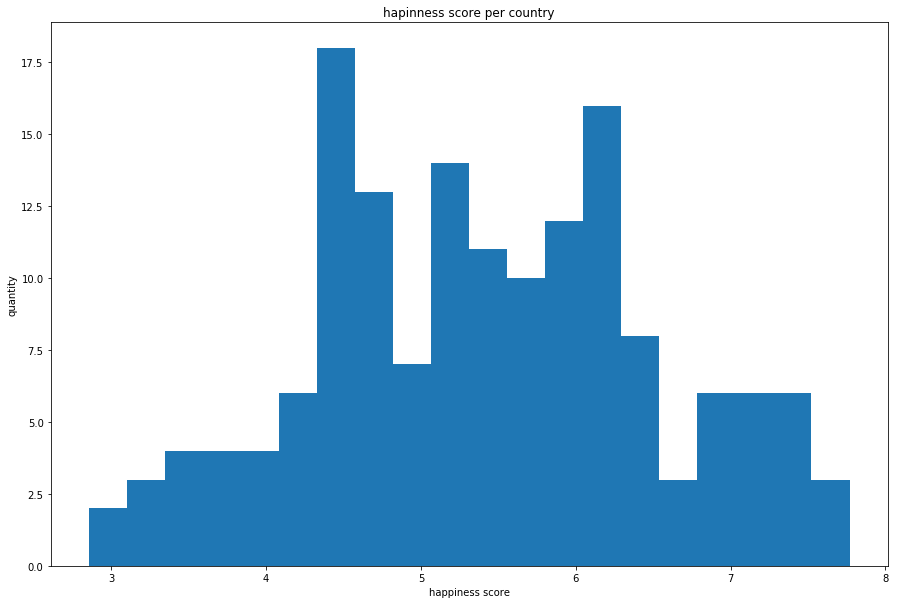

In [365]:
#2-1 Plot the distribution of happoness score per country
plt.figure(figsize=(15,10))
plt.hist(df["Score"], bins=20)
plt.title("hapinness score per country")
plt.xlabel("happiness score")
plt.ylabel("quantity")
plt.show()

In [369]:
#2-2 Find 10 least happy countries
print("10 least happy countries:")
print(df.sort_values(by="Score",ascending=True)[["Country or region", "Score"]].head(15).to_string(index=False))

10 least happy countries:
         Country or region  Score
               South Sudan  2.853
  Central African Republic  3.083
               Afghanistan  3.203
                  Tanzania  3.231
                    Rwanda  3.334
                     Yemen  3.380
                    Malawi  3.410
                     Syria  3.462
                  Botswana  3.488
                     Haiti  3.597
                  Zimbabwe  3.663
                   Burundi  3.775
                   Lesotho  3.802
                Madagascar  3.933
                   Comoros  3.973


In [218]:
#2-3 What is the average of happiness?
average=df.Score.mean()
print('The average of happiness: ' + str(average))

The average of happiness: 5.407032051282051


In [219]:
#2-4 What are the countries above the median 
median = df.Score.median()
print('The median of happiness score : {}'.format(median))

The median of happiness score : 5.3795


In [221]:
print('The countries above the median:\n')
print(df[df['Score'] > median][['Country or region', 'Score']].to_string(index=True))

The countries above the median:

            Country or region  Score
0                     Finland  7.769
1                     Denmark  7.600
2                      Norway  7.554
3                     Iceland  7.494
4                 Netherlands  7.488
5                 Switzerland  7.480
6                      Sweden  7.343
7                 New Zealand  7.307
8                      Canada  7.278
9                     Austria  7.246
10                  Australia  7.228
11                 Costa Rica  7.167
12                     Israel  7.139
13                 Luxembourg  7.090
14             United Kingdom  7.054
15                    Ireland  7.021
16                    Germany  6.985
17                    Belgium  6.923
18   United States of America  6.892
19             Czech Republic  6.852
20       United Arab Emirates  6.825
21                      Malta  6.726
22                     Mexico  6.595
23                     France  6.592
24                     Taiwan  6.446
25   

In [197]:
#2-5 Plot the correlation between? pairs of variables 
#First pair - Country or Region and score
compare = df.groupby(['Score'])['Social support'].transform(max) == df['Social support']
df[compare][['Score','Social support']]

,Score,Social support
0,7.769,1.587
1,7.600,1.573
2,7.554,1.582
3,7.494,1.624
4,7.488,1.522
5,7.480,1.526
6,7.343,1.487
7,7.307,1.557
8,7.278,1.505
9,7.246,1.475


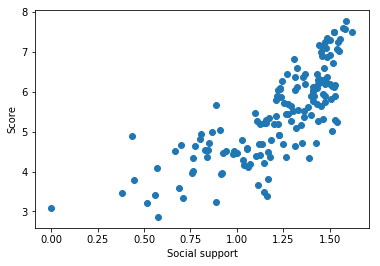

In [199]:
y = df[compare]['Score']
x = df[compare]['Social support']
plt.xlabel('Social support')
plt.ylabel('Score')
plt.scatter(x,y)

In [195]:
#Second pair - Generosity and Social Support
compare = df.groupby(['Score'])['Healthy life expectancy'].transform(max) == df['Healthy life expectancy']
df[compare][['Score','Healthy life expectancy']]

,Generosity,Social support
0,0.153,1.587
1,0.252,1.573
2,0.271,1.582
3,0.354,1.624
5,0.263,1.526
6,0.267,1.487
7,0.330,1.557
8,0.285,1.505
10,0.332,1.548
12,0.261,1.455


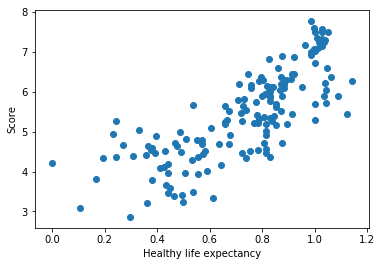

In [200]:
y = df[compare]['Score']
x = df[compare]['Healthy life expectancy']
plt.xlabel('Healthy life expectancy')
plt.ylabel('Score')
plt.scatter(x,y)